In [1]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [2]:
x1 = np.load('./dataset4.npz')['x1']
x2 = np.load('./dataset4.npz')['x2']
y = np.load('./dataset4.npz')['y']

#Construct a uniform grid
size = 21
a = np.linspace(0,2,size)
b = np.linspace(3.5,4.5,size)

# Perform search
loss = np.zeros((size,size))

for i in range(a.shape[0]) :
    for j in range(b.shape[0]) :
        loss[i,j] = np.sum((((a[i] * x1**2) + (b[j] * x2)) - y)**2)
        
min_arr = np.where(loss == np.min(loss))      
print('Optimal Thera values : ',a[min_arr[0]],b[min_arr[1]])
print('Loss at Optimal Theta : ',loss[min_arr[0],min_arr[1]])

Optimal Thera values :  [1.6] [3.7]
Loss at Optimal Theta :  [0.94627681]


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [3]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

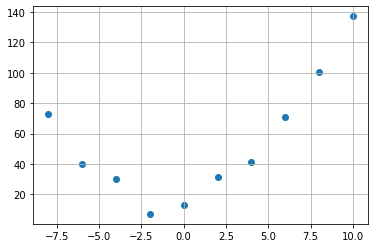

In [4]:
X = np.load('./dataset2.npz')['x']
y = np.load('./dataset2.npz')['y']

y = y.reshape(-1,1)
X_appended = np.concatenate([X.reshape(-1,1),np.ones((X.shape[0],1))],axis = 1)
X_appended.shape

plt.scatter(X,y)
plt.grid()
plt.show()

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

Slope :  [4.01062495] Intercept :  [50.46491532]


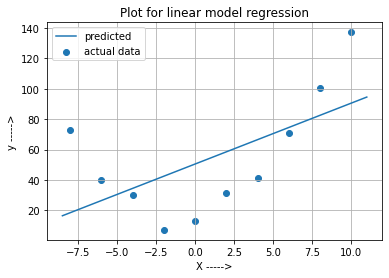

Mean Square Error :  977.1734445909718


In [89]:
reg_linear = LinearRegression().fit(X.reshape(-1,1),y)
print('Slope : ',reg_linear.coef_[0],'Intercept : ',reg_linear.intercept_)

x_plot = np.linspace(-8.5,11,400).reshape(-1,1)
y_plot = reg_linear.predict(x_plot)

plt.plot(x_plot,y_plot,label ='predicted')
plt.scatter(X,y,label='actual data')
plt.legend()
plt.grid()
plt.title('Plot for linear model regression')
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.show()

mean_square_error_linear = mean_squared_error(reg_linear.predict(X.reshape(-1,1)),y)
print('Mean Square Error : ',mean_square_error_linear)

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

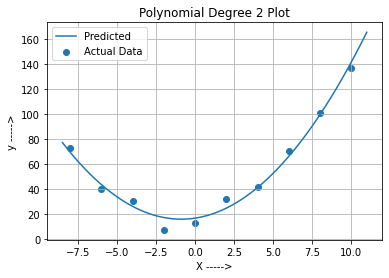

Mean Square Error :  24.846331727808156


In [88]:
poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X.reshape(-1,1))

reg_quad = LinearRegression().fit(X_transform , y)

x_plot = np.linspace(-8.5,11,400)
y_plot = reg_quad.predict(poly.fit_transform(x_plot.reshape(-1,1)))

plt.plot(x_plot,y_plot,label='Predicted')
plt.scatter(X,y,label = 'Actual Data')
plt.grid()
plt.legend()
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.title('Polynomial Degree 2 Plot')
plt.show()

mean_square_error_quad = mean_squared_error(reg_quad.predict(X_transform),y)
print('Mean Square Error : ',mean_square_error_quad)

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

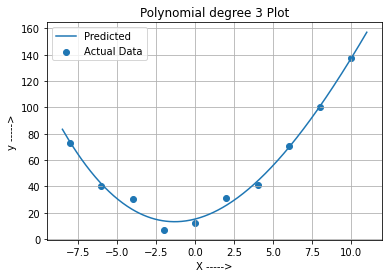

Mean Square Error :  16.26492228044507


In [74]:
poly_cubic = PolynomialFeatures(3)
X_transform = poly_cubic.fit_transform(X.reshape(-1,1))

reg_cubic = LinearRegression().fit(X_transform , y)

x_plot = np.linspace(-8.5,11,400)
y_plot = reg_cubic.predict(poly_cubic.fit_transform(x_plot.reshape(-1,1)))

plt.plot(x_plot,y_plot,label='Predicted')
plt.scatter(X,y,label='Actual Data')
plt.legend()
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.title('Polynomial degree 3 Plot')
plt.grid()
plt.show()

mean_square_error_cubic = mean_squared_error(reg_cubic.predict(X_transform),y)
print('Mean Square Error : ',mean_square_error_cubic)

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

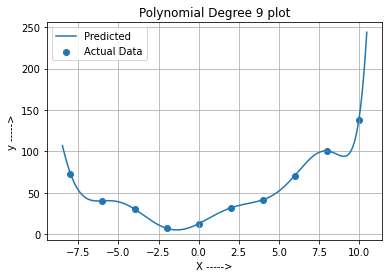

Mean Square Error :  9.513905141379207e-13


In [76]:
poly_nine = PolynomialFeatures(9)
X_transform = poly_nine.fit_transform(X.reshape(-1,1))

reg_nine = LinearRegression().fit(X_transform , y)

x_plot = np.linspace(-8.5,10.5,400)
y_plot = reg_nine.predict(poly_nine.fit_transform(x_plot.reshape(-1,1)))

plt.plot(x_plot,y_plot,label='Predicted')
plt.scatter(X,y,label='Actual Data')
plt.grid()
plt.legend()
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.title('Polynomial Degree 9 plot')
plt.show()

mean_square_error_nine = mean_squared_error(reg_nine.predict(X_transform),y)
print('Mean Square Error : ',mean_square_error_nine)

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

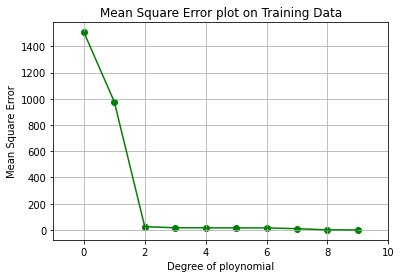

Based on the training data, we can see that the polynomial with error 9 has the least error. Hence that should be the most apt model.


In [77]:
def error(X,y,i) :
    poly = PolynomialFeatures(i)
    X_transform = poly.fit_transform(X.reshape(-1,1))

    reg = LinearRegression().fit(X_transform , y)

    mean_square_error = mean_squared_error(reg.predict(X_transform),y)
    return mean_square_error , reg

train_mse_list = []
reg_list = []
for i in range(10) :
    mse , reg = error(X,y,i)
    train_mse_list.append(mse)
    reg_list.append(reg)

plt.plot(np.linspace(0,9,10),train_mse_list,c='green')
plt.scatter(np.linspace(0,9,10),train_mse_list,c='green')
plt.grid()
plt.xlabel('Degree of ploynomial')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error plot on Training Data')
plt.xlim([-1,10])
plt.show()
print('Based on the training data, we can see that the polynomial with error 9 has the least error. Hence that should be the most apt model.')

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

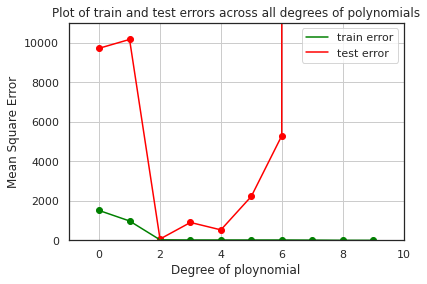

The points for which the test error is not visible implies that the error is extremely high. In order to visualize that comment out the plt.ylim line


In [97]:
def test_error(X , X_test , y , y_test , i) : 
    poly = PolynomialFeatures(i)
    X_transform = poly.fit_transform(X.reshape(-1,1))
    reg = LinearRegression().fit(X_transform , y)
    
    mean_square_error = mean_squared_error(reg.predict(poly.fit_transform(X_test.reshape(-1,1))),y_test.reshape(-1,1))
    return mean_square_error , reg

X_test = np.load('./dataset2_test.npz')['x']
y_test = np.load('./dataset2_test.npz')['y']

test_mse_list = []
reg_list = []
for i in range(10) :
    mse , reg = test_error(X,X_test,y,y_test,i)
    test_mse_list.append(mse)
    reg_list.append(reg)
    
plt.plot(np.linspace(0,9,10),train_mse_list,c='green',label='train error')
plt.scatter(np.linspace(0,9,10),train_mse_list,c='green')
plt.plot(np.linspace(0,9,10),test_mse_list,c='red',label='test error')
plt.scatter(np.linspace(0,9,10),test_mse_list,c='red')
plt.grid()
plt.xlabel('Degree of ploynomial')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error plot on Training Data')
plt.xlim([-1,10])
plt.ylim([0,1.1e4])
plt.legend()
plt.title('Plot of train and test errors across all degrees of polynomials')
plt.show()    
print('The points for which the test error is not visible implies that the error is extremely high. In order to visualize that comment out the plt.ylim line')

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

In [80]:
print('Index with least test error : ',np.argmin(test_mse_list))
print('Hence , based on the test error since polynomial with degree ',np.argmin(test_mse_list),'has the least test error, that would be the best fit')

Index with least test error :  2
Hence , based on the test error since polynomial with degree  2 has the least test error, that would be the best fit


# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

,RAD,CHAS,ZN,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
Mean,9.549407,0.06917,11.363636,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
Median,5.000000,0.00000,0.000000,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
Mode,24.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max Value,24.000000,1.00000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min Value,1.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Range,23.000000,1.00000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25% Quantile,NaN,NaN,NaN,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50% Quantile,NaN,NaN,NaN,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75% Quantile,NaN,NaN,NaN,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000


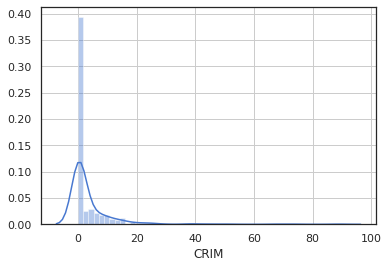

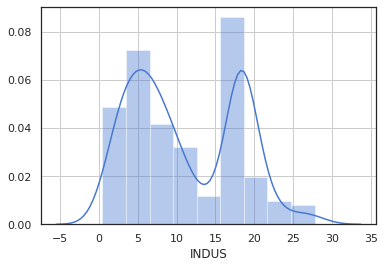

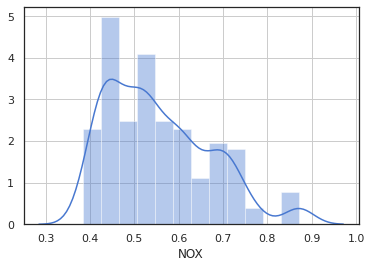

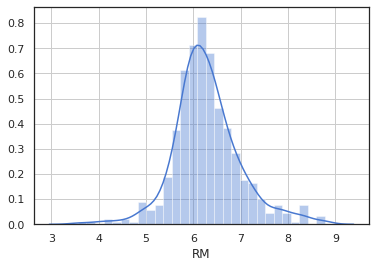

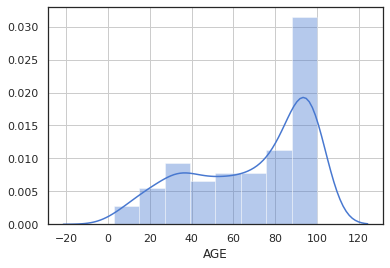

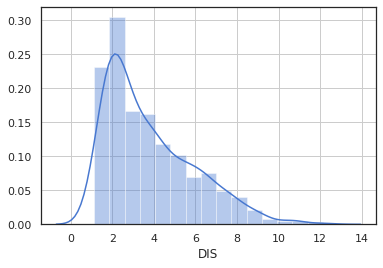

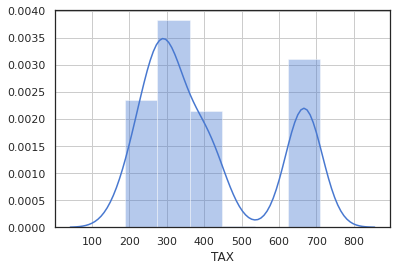

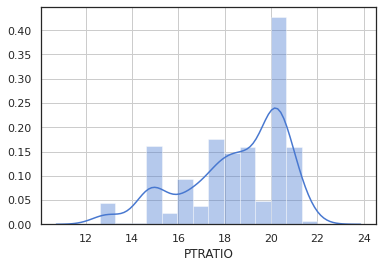

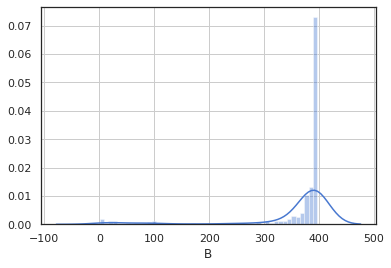

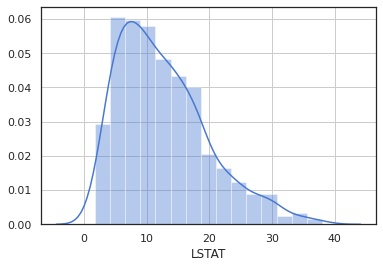

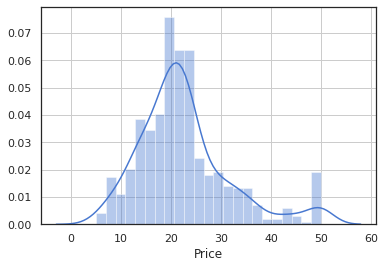

In [7]:
import seaborn as sns

def Mode(arr) :
    sets_arr = list(set(arr))
    counts = np.zeros((len(sets_arr),1))
    for i in arr :
        counts[sets_arr.index(i),0] = counts[sets_arr.index(i),0] + 1
    return sets_arr[np.argmax(counts)]    

dataset = pd.read_csv('./dataset3.csv')
categorical_columns = ['RAD','CHAS','ZN']
noncategorical_columns = [ i  for i in dataset.columns if i not in categorical_columns]
features_columns = [ i  for i in dataset.columns if i != 'Price']

dataframe_stats = pd.DataFrame(index=['Mean','Median','Mode','Max Value','Min Value','Range','25% Quantile','50% Quantile','75% Quantile'])

for i in categorical_columns :
    stats_list = []
    stats_list.append(np.mean(dataset[i]))
    stats_list.append(np.median(dataset[i]))
    stats_list.append(Mode(dataset[i]))
    stats_list.append(np.max(dataset[i]))
    stats_list.append(np.min(dataset[i]))
    stats_list.append(np.max(dataset[i])-np.min(dataset[i]))
    stats_list.append(np.NaN)
    stats_list.append(np.NaN)
    stats_list.append(np.NaN)
    dataframe_stats[i] = stats_list
    
for i in noncategorical_columns :
    stats_list = []
    stats_list.append(np.mean(dataset[i]))
    stats_list.append(np.median(dataset[i]))
    stats_list.append(np.NaN)
    stats_list.append(np.NaN)
    stats_list.append(np.NaN)
    stats_list.append(np.NaN)
    stats_list.append(np.quantile(dataset[i],0.25))
    stats_list.append(np.quantile(dataset[i],0.5))
    stats_list.append(np.quantile(dataset[i],0.75))
    dataframe_stats[i] = stats_list 
    
df = dataset[noncategorical_columns]

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
i =0 

for col_id in df.columns:
    plt.figure(i)
    plt.grid()
    sns.distplot(df[col_id])
    i = i + 1
    
dataframe_stats    

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

<AxesSubplot:>

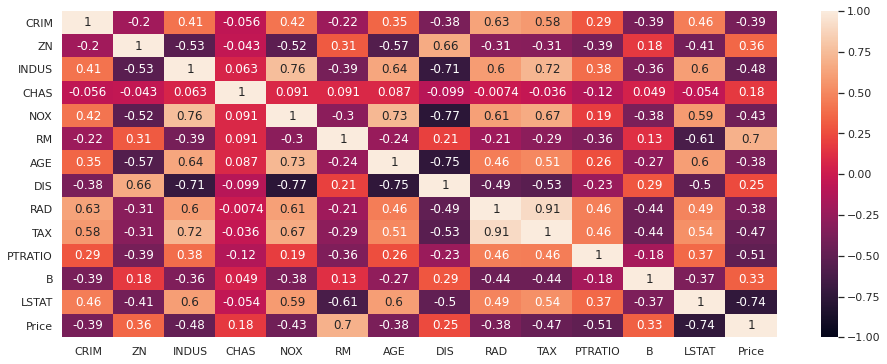

In [8]:
import seaborn as sns
corr_dataframe = dataset.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(dataset.corr(),vmin = -1 , vmax = 1,annot=True)

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

In [9]:
price_corr = corr_dataframe['Price']
sort_price_corr = abs(price_corr).sort_values(ascending = False)

print('The most highly correlated feature with respect to price is : ',sort_price_corr.index[1])
print('------------------------------------')
print('The correlation values for various features with price are as below\n')
print(sort_price_corr)

The most highly correlated feature with respect to price is :  LSTAT
------------------------------------
The correlation values for various features with price are as below

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64


## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train , y_test = train_test_split( dataset[features_columns], dataset['Price'] , test_size = 0.33 , random_state = 2020)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [18]:
reg_house_price = LinearRegression().fit(X_train_norm,y_train)

print('Train MSE :',mean_squared_error(y_train , reg_house_price.predict(X_train_norm)))

Train MSE : 22.166423224150183


## 8.6. Predict Outputs for Test Data
Report test MSE

In [19]:
print('Test MSE :',mean_squared_error(y_test , reg_house_price.predict(X_test_norm)))

Test MSE : 22.00486155535462


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [20]:
imp_dataframe = pd.DataFrame(abs(reg_house_price.coef_) , index = list(dataset[features_columns].columns),columns = ['Coefficient Values'] )
sort_imp_dataframe = imp_dataframe['Coefficient Values'].sort_values(ascending = False)

print(sort_imp_dataframe)

LSTAT      3.629957
RM         3.167017
DIS        3.017426
RAD        2.611485
PTRATIO    1.958751
TAX        1.872496
NOX        1.785335
ZN         1.036540
CRIM       0.942794
CHAS       0.873298
B          0.790296
AGE        0.281927
INDUS      0.109869
Name: Coefficient Values, dtype: float64


# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

1. Assumption 1 - The assumption of linearity doesnt hold between X and y. As can be seen from the plot, a straight line cant be fit to explain the behaviour between X and y. Assumption 2 - Homoscedanticity assumption is not held because the avariance of residual depends on the value of X. Assumption 3 - The assumption that the observations are independent of each other holds. Assumption 4 - When using the linear regression for polynomial degree, the multi colinearity assumption is not valid since the features aren't independent(x and x^3 are dependent and so on). 

2. From the list of highly correlated features and highly improtant features, we can observe that both the lists have similar features at the top. For instance features such as LSTAT and RM which occur in the top of both the lists. This brings us to a conclusion that highly correlated features will have a greater impact on the regression model. 

3. Since the model is optimised for the training examples i.e. when building the model since the loss function which the model is optimized on are the training data points. Hence, the trained model will be in general able to fit the training examples better than the test datapoints which the model hasn't been optimized on. 

4. Yes, the analytical solution will be valid on this dataset. Since the dataset has relatively small number of data points and the features are as well small in number, the boston housing price dataset can use the analytical solution. As demonstrated below, we will be obtaining the same result as obtained using the LinearRegression().fit() function.

In [30]:
X_appended = np.concatenate([X_train_norm , np.ones((X_train_norm.shape[0],1))] , axis = 1)

theta = np.sort((np.dot(np.linalg.pinv(np.dot(X_appended.T,X_appended)),np.dot(X_appended.T,y_train))))
print('Optimal value of theta : ',theta)

Optimal value of theta :  [-3.62995652 -3.01742639 -1.95875088 -1.87249638 -1.78533499 -0.94279401
 -0.2819268   0.10986932  0.79029637  0.87329794  1.03653999  2.61148543
  3.16701747 22.84926254]
